::: {.hidden}
$$
\newcommand{\R}{\mathbb{R}}
\newcommand{\vx}{\mathbf{x}}
\newcommand{\vw}{\mathbf{w}}
\newcommand{\vz}{\mathbf{z}}
\newcommand{\norm}[1]{\lVert #1 \rVert}
\newcommand{\bracket}[1]{\langle #1 \rangle}
\newcommand{\abs}[1]{\lvert #1 \rvert}
\newcommand{\paren}[1]{\left( #1 \right)}
$$

:::

## Graphing Decision Boundaries {#sec-score-based-classification}

### Part A

Sketch the line in $\R^2$ described by the equation 
$$ 
\bracket{\vw, \vx}  =  b\;, 
$$ {#eq-linear-boundary}

where $\vw = \paren{1, -\frac{1}{2}}^T \in \R^2$ and $b = \frac{1}{2}$. Here, $\bracket{\vw, \vx} = \sum_{i = 1}^p w_i x_i$ is the inner product (or dot product) between the vectors $\vw,\vx \in \R^p$. 

### Part B

[You can create `numpy` arrays like this: `x = np.array([0.2, 4.3])`. The syntax `x@w` can also be used as a convenient shorthand for `np.dot(x, w)`.]{.aside}

Write a quick Python function called `linear_classify(x, w, b)`. `w` and `x` should both be 1d `numpy` arrays of the same length, and `b` should be a scalar. The function `np.dot(x, w)` will compute the inner product of `x` and `w`. Argument `b` should be a scalar number. Your function should return `0` if if $\bracket{\vw, \vx}  <  b$ and `1` if $\bracket{\vw, \vx}  \geq  b$.

Verify that your function works on a few simple examples. 

### Part C

[The function $\phi$ is an example of a *feature map*, which we will discuss soon.]{.aside}

Let $\phi:\mathbb{R}^2\rightarrow \mathbb{R}^5$ be the function 

$$
\phi(\mathbf{x}) = \phi(x_1, x_2) = (x_1, x_2, x_1^2, x_2^2, x_1x_2)^T\;. 
$$

Make a sketch of the curve in $\R^2_+$ (the nonnegative quadrant) defined by the equation 

$$
\bracket{\vw, \phi(\vx)} = b\;, 
$$

where $\vw = (0, 0, 1, \frac{1}{4}, 0)^T$ and $b = 1$. 


## Meet The Palmer Penguins! {#sec-penguins}

![Image source: \@allisonhorst. The Palmer Penguins data was originally collected by @gormanEcologicalSexualDimorphism2014 and was nicely packaged and released for use in the data science community by @horstAllisonhorstPalmerpenguinsV02020.](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

Our data set for class today is the Palmer Penguins. This data set contains physiological measurements and species labels for several populations of Adelie, Chinstrap, and Gentoo penguins. 

Open a fresh Jupyter notebook using the `ml-0451` Anaconda Python kernel. In a code cell, paste and run the following code in order to acquire the data set. 

```python
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/palmer-penguins.csv"
df = pd.read_csv(url)
```

### Part A

Use a `pandas` summary table (`df.groupby(...).aggregate(...)`) to answer the following question: how does the mean mass of penguins vary by species and sex? 

::: {.column-margin}

![Image source: \@allisonhorst.](https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png) 

:::

### Part B

Make a [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) of culmen length against culmen depth, with the color of each point corresponding to the penguin species. 

## Choosing a Threshold {#sec-decision-theory}

### Part A

You wake up feeling a bit of a tickle in your throat. You take a COVID rapid test. Consider two scenarios: 

(a) The test comes up positive and you quarantine for five days. As it turns out, your throat tickle disappears after 1 day, and a lab test reveals that you did **not** actually have COVID. 
(b) The test comes up negative. You figure you must just have a common cold. You carry on your day as usual. After 5 days, you decide to get a lab test, which reveals that you have been COVID+ for the last 5 days. 

[If it feels very difficult to come up with a single number to summarize the "cost" of each of these outcomes, that's normal! In practice, designers of automated decision systems may need to assign comparable "costs" to injury, life, access to education, etc.]{.aside}

Using any assumptions that seem appropriate to you, assign a numerical **cost** to each of these scenarios. If it helps, you may assume that scenario (a) is 1 "unit of badness," and that scenario (b) is $k$ times as bad as scenario (a). What's your suggested value of $k$? 

Please write down your reasoning and your suggested value in a short paragraph. 

### Part B

Let's now imagine that the rapid COVID test does not just give a yes/no answer, but actually a *score* describing the patient's likelihood of COVID on a scale from 0 to 1. What score is high enough to merit you staying home, according to your costs from Part A? To answer this question, run the following code to create a simulated vector of `cases` (0 is COVID negative, 1 is COVID positive) and `scores` between 0 and 1. 

```python
import numpy as np

NUM_CASES  = 1000
PREVALENCE = 0.1
NOISE      = 2

cases  = 1*(np.random.rand(NUM_CASES) < PREVALENCE)
scores = np.exp(cases + NOISE*(np.random.rand(NUM_CASES))) / np.exp(NOISE+1)
```

Suppose that the recommendation on the rapid test is that a score above $t$ indicates a "positive" result and that you should quarantine. 

1. Write a function which, given a candidate value of $t$, computes the total "cost" of using that threshold. The cost is equal to the number of times scenario (a) occurs in this data set (from Part A), multiplied by the cost of scenario (a), plus the number of times scenario (b) occurs in this data set, multiplied by the cost of scenario (b). 
2. Using a `for`-loop or any other technique, conduct a search to find the value of $t$ that minimizes the total cost. 




## Experiencing (Un)Fairness {#sec-fairness}

*In completing this warmup, please keep in mind that you will be asked to share with your group and potentially with the class.*

Take 30 minutes to write two paragraphs. 

In your first paragraph, please respond to the following prompt: 

::: {.column-margin}
You can choose to discuss a decision that either unfairly harmed **or** unfairly benefited you.
:::

> When was a time in your life in which you felt that **you were the subject of an unfair decision**? What was it about that decision that made it feel **unfair**, rather than just bad, disappointing, or surprising?

In your second paragraph, please respond to the following prompt: 

> Consider Figure 4 in the [Introduction](https://fairmlbook.org/introduction.html) of *BHN*. In this figure, there are blue dots and green dots, where the colors correspond to hypothetical demographic attributes. We as the reader can choose what the colors mean. 
> 
>- Suggest one possible meaning for the blue and green dots in which you would say that the classifier depicted in the figure is unproblematic from the perspective of fairness. 
>- Suggest one possible meaning for the blue and green dots in which you would say that the classifier depicted in the figure is concerning from the perspective of fairness. 
>- What is the relevant difference between the two cases? 

Please bring your paragraphs to class and be ready to share with your group. 

## Reading Check: BHN {#sec-bhn-comprehension}

For each of the following soundbites, please write **two sentences** describing how @barocasFairnessMachineLearning2023 would respond. Please also include **the number of the page** on which you are basing your sentences in [this PDF version of the book](https://fairmlbook.org/pdf/fairmlbook.pdf). You might find useful discussion of the point on multiple pages; it's sufficient to list one.  

You may need to check both [the reading for today](https://fairmlbook.org/classification.html) and the [reading from the previous lecture](https://fairmlbook.org/introduction.html).   

1. "*Since the COMPAS algorithm didn't use race as a predictor variable during training, it can't be racially biased.*"
2. "*For every decision-making task, it is possible to ethically deploy an appropriately trained and audited automated decision model.*"
3. "*If two groups $a$ and $b$ are on average equally deserving of access to an opportunity, then the only requirement of fairness is that a decision-making system accepts members of group $a$ at the same rate as members of group $b$.*"
4. "*Decision-making algorithms should have equal error rates between different groups.*"
5. "*The data doesn't lie, so the only fair approach to machine learning is to replicate patterns found in the data as accurately as possible.*"


## Linear Models, Perceptron, and Torch {#sec-perceptron}

In this warmup, you will introduce yourself to the model template code that we'll use to implement several different machine learning models in this course. As you do so, you'll use the Torch package (instead of Numpy) for numerical calculations. 

Here's a function which generates the kind of data we are going to use with the perceptron, including a feature matrix and a set of predictor labels. Instead of `np.array`s, these are now `torch.Tensor`s. You can still think of them as arrays of numbers with most of the same operations. Most things that you have learned about `np.array`s will still work for `torch.Tensor`s, and in this warmup I will point out all the relevant differences. 

In [1]:
import torch

torch.manual_seed(1234)

def perceptron_data(n_points = 300, noise = 0.2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,2))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)

    # convert y from {0, 1} to {-1, 1}
    y = 2*y - 1

    return X, y

X, y = perceptron_data(n_points = 300, noise = 0.2)

Here's how it looks: 

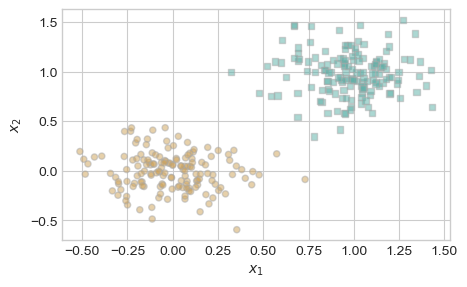

In [11]:
#| code-fold: true
#| echo: false

from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

def plot_perceptron_data(X, y, ax):
    targets = [-1, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

fig, ax = plt.subplots(1, 1)
plot_perceptron_data(X, y, ax)

To define a classifier for this data, we are going to define three Python classes. 

- The `LinearModel` class is a template for several linear models that we will implement in this class. Recall that a linear model is a model that works by computing a score for each data point like $s_i = \langle \mathbf{w}, \mathbf{x}_i \rangle$. This class has a single instance variable: the weight vector $\mathbf{w}$. 
- The `Perceptron` class inherits from `LinearModel` and describes the specific linear model we will use in lecture today. 
- The `PerceptronOptimizer` class will implement the specific learning algorithm that will improve the value of $\mathbf{w}$ in order to optimize an objective.  

Here are the three classes. I have written docstrings for the methods that we'll implement in this warmup. 

In [2]:
#| eval: false

import torch

class LinearModel:

    def __init__(self):
        self.w = None 

    def score(self, X):
        """
        Compute the scores for each data point in the feature matrix X. 
        The formula for the ith entry of s is s[i] = <self.w, x[i]>. 

        If self.w currently has value None, then it is necessary to first initialize self.w to a random value. 

        ARGUMENTS: 
            X, torch.Tensor: the feature matrix. X.size() == (n, p), 
            where n is the number of data points and p is the 
            number of features. This implementation always assumes 
            that the final column of X is a constant column of 1s. 

        RETURNS: 
            s torch.Tensor: vector of scores. s.size() = (n,)
        """
        if self.w is None: 
            self.w = torch.rand((X.size()[1]))

        # your computation here: compute the vector of scores s
        pass 

    def predict(self, X):
        """
        Compute the predictions for each data point in the feature matrix X. The prediction for the ith data point is either 0 or 1. 

        ARGUMENTS: 
            X, torch.Tensor: the feature matrix. X.size() == (n, p), 
            where n is the number of data points and p is the 
            number of features. This implementation always assumes 
            that the final column of X is a constant column of 1s. 

        RETURNS: 
            y_hat, torch.Tensor: vector predictions in {0.0, 1.0}. y_hat.size() = (n,)
        """
        pass 

class Perceptron(LinearModel):

    def loss(self, X, y):
        """
        Compute the misclassification rate. A point i is classified correctly if it holds that s_i*y_i_ > 0, where y_i_ is the *modified label* that has values in {-1, 1} (rather than {0, 1}). 

        ARGUMENTS: 
            X, torch.Tensor: the feature matrix. X.size() == (n, p), 
            where n is the number of data points and p is the 
            number of features. This implementation always assumes 
            that the final column of X is a constant column of 1s. 

            y, torch.Tensor: the target vector.  y.size() = (n,). The possible labels for y are {0, 1}
        
        HINT: In order to use the math formulas in the lecture, you are going to need to construct a modified set of targets and predictions that have entries in {-1, 1} -- otherwise none of the formulas will work right! An easy to to make this conversion is: 
        
        y_ = 2*y - 1
        """

        # replace with your implementation
        pass

    def grad(self, X, y):
        pass 

class PerceptronOptimizer:

    def __init__(self, model):
        self.model = model 
    
    def step(self, X, y):
        """
        Compute one step of the perceptron update using the feature matrix X 
        and target vector y. 
        """
        pass

### Part A

Open a fresh Jupyter notebook with the `ml-0451` kernel. Paste in the code that generates the data, as well as the three class definitions above. 

Please implement `LinearModel.score()` and `LinearModel.predict()` according to their supplied docstrings. 

An ideal solution will use *no* `for`-loops. It is possible to complete `LinearModel.score()` with one additional line of code and `LinearModel.predict()` with two lines of code. 

### Part B

Please implement `Perceptron.loss()` according to its supplied docstring. It is possible to complete this function with two lines of code. 

*Hints*

- Two numbers $a$ and $b$ have the same sign iff $ab > 0$. 
- In `torch`, you can't compute `a.mean()` if `a` is a boolean tensor. Instead, you need to cast `a` to a tensor of numerical values.  One way to do this is by computing `(1.0*a).mean()`. 

### Check

Once you have completed Parts A and B, the below code should run and the value of `l` should be `0.5`. Paste it into a new cell in your notebook and run it to check. 


```python
p = Perceptron()
s = p.score(X)
l = p.loss(X, y)
print(l == 0.5)
```


*There are several other methods in these classes that we will need to implement in order to have a functioning classification algorithm, but we won't worry about those until later*. 


## COMPAS and Equality of Opportunity {#sec-views-on-compas}

[Recently](https://www.philchodrow.prof/ml-notes/chapters/10-compas.html), we replicated [ProPublica's investigative reporting on the COMPAS algorithm](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing) and [studied](https://www.philchodrow.prof/ml-notes/chapters/12-statistical-fairness.html) several competing statistical definitions of fairness. 

Imagine that this article came out two weeks ago. **What should we do about the situation reported by ProPublica?** Please address this question from three distinct perspectives: 

1. The perspective of someone who adheres to the *narrow view* of equality of opportunity. 
2. The perspective of someone who adheres to the *middle view* of equality of opportunity. 
3. The perspective of someone who adheres to the *broad view* of equality of opportunity. 

[You may find it useful to remember from the readings that *calibration*, as discussed in BHN Ch. 4 is related to *sufficiency*, which is discussed in BHN Ch. 3 and also in [our notes on statistical conceptions of fairness](https://www.philchodrow.prof/ml-notes/chapters/12-statistical-fairness.html).]{.aside}
Write at least three sentences from each of these perspectives. Your response should, at minimum, address the following two questions: 

- Is the [narrow/middle/broad] view of equality of opportunity in fact violated, according to our previous data analysis? 
- If so, what change is obligated? 
- Whose obligation is it to enact that change? Whose obligation is it to incur the costs of that change? 


Please ground your sentences in our quantitative findings and our recent readings on [statistical](https://fairmlbook.org/classification.html) and [normative](https://fairmlbook.org/relative.html) notions of fairness. If you think the answer isn't cut-and-dried, please do your best analysis and make a note about what's complicated and why. 

## Power, Data, and Studying Up {#sec-studying-up}

For each of the hypothetical scenarios below, please: 

a. Briefly analyze the scenario in terms of the four domains of the matrix of domination. Which of these domains are operating in the scenario provided? There are probably multiple, but not necessarily all four. 
b. Suggest a way in which data scientists could "study up" [@barabasStudyingReorientingStudy2020] by collecting and analyzing data about the powerful or privileged actors in the scenario. 

A concise paragraph for each scenario is plenty. 

### Scenarios

1. Landlords use an algorithm to predict "payment reliability" of prospective tenants in apartment complexes. The algorithm gives lower reliability scores to prospective tenants moving from predominantly Latinx/Hispanic neighborhoods than it does to prospective tenants moving from predominantly white neighborhoods. 
2. Police use predictive policing algorithms that encourage them to allocate officers to neighborhoods that have historically had high arrest rates. A local politician tweets that these neighborhoods are "blighted." 
3. Medical professionals use a health score to determine which patients should receive palliative care. The score includes an assessment of pain levels as one of its inputs. [Doctors are known](https://www.aamc.org/news/how-we-fail-black-patients-pain) to systematically underestimate the pain levels of Black patients in comparison to white ones. 

## Data Context and Data Sheets {#sec-data-sheets}

*This warmup is based on Ch. 6 of @dignazioDataFeminism2023 and @gebruDatasheetsDatasets2021*. 

Let's go back to our running example of the COMPAS data set. As you may remember, the data that feeds into a COMPAS risk score is collected by a screener using [forms like this one](https://www.documentcloud.org/documents/2702103-Sample-Risk-Assessment-COMPAS-CORE). Such risk assessments are administered to people who have been arrested and charged with criminal activity. 

### Part A

Using [the writeup from ProPublica](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing) and any additional sources you are able to find, please respond to the following questions from @gebruDatasheetsDatasets2021 in order to construct a (very partial) datasheet for the COMPAS data set. 

You may be able to answer many of these questions off the top of your head. For others, the answers might be a little blurry. For example, who created the COMPAS data set? Northpointe? The criminal penal system? ProPublica? In other cases, you might not know the answer -- it's fine to mark that and move on. Short responses are fine. 

#### Motivation

1. For what purpose was the dataset created? 
2. Who created the dataset (for example, which team, research group)
and on behalf of which entity (for example, company, institution, organization)?

#### Composition

1. What do the instances (rows) that comprise the dataset represent?
2. Does the dataset contain all possible instances or is it a sample (not necessarily random) of instances from a larger set? 
    - *Note*: this is another one that might take some thought. 
3. Does the dataset identify any subpopulations (for example, by age, gender)?
4. Is it possible to identify individuals (that is, one or more natural persons), either directly or indirectly (that is, in combination with other data) from the dataset? 
5. Does the dataset contain data that might be considered sensitive in any way (for example, data that reveals race or ethnic origins, sexual orientations, religious beliefs, political opinions or union memberships, or locations; financial or health data; biometric or genetic data; forms of government identification, such as social security numbers; criminal history)? 

#### Collection Process 

1. How was the data associated with each instance acquired?
2. Who was involved in the data collection process?
3. Did the individuals in question consent to the collection and use of their data?
4. If consent was obtained, were the consenting individuals provided with a mechanism to revoke their consent in the future or for certain uses?

#### Uses 

1. Has the data set been used for any tasks already?
2. What (other) tasks could the data set be used for? 
3. Is there anything about the composition of the dataset or the way it was collected and preprocessed/ cleaned/labeled that might impact future uses? *For example, is there anything that a dataset consumer might need to know to avoid uses that could result in unfair treatment of individuals or groups (for example, stereotyping, quality of service issues) or other risks or harms (for example, legal risks, financial harms)? If so, please provide a description. Is there anything a dataset consumer could do to mitigate these risks or harms?*
4. Are there tasks for which the dataset should not be used?

### Part B 

@dignazioDataFeminism2023 emphasize the importance of the *context* of the data when deciding what data science to do and how to interpret it. Consider the following hypothetical, out-of-context statement: 

> The COMPAS data set describes the the social background, thought patterns, criminal histories, and reoffenses for all criminal perpetrators in Broward County during the time period. 

In roughly one paragraph, analyze this statement against what you know about the *context* of the data, including your datasheet and our previous discussions. What context is missing from this statement? Which aspects of this statement are incorrect? Why does it matter?

## Practice with Convex Functions {#sec-convexity}


### Part A

Please write a careful mathematical proof of the following statement. You may cite without proving any of the statements [from the reading](https://sboyles.github.io/teaching/ce377k/convexity.pdf) up to page 7. As suggested in the reading, Prop 2. (the second derivative test) is likely to be especially useful. 

**Claim**: Let $f:\mathbb{R}\rightarrow\mathbb{R}$ be any differentiable and convex function. Then, the function $g(x) = f(ax + b)$ is also convex, where $a$ and $b$ are any constants. 

### Part B 

The logistic sigmoid $\sigma$ is the function $\sigma: \mathbb{R} \rightarrow \mathbb{R}$ given by the formula 
$$
\begin{aligned}
    \sigma(z) = \frac{1}{1 + e^{-z}}\;. 
\end{aligned}
$$

#### B.1 

Use `matplotlib` with either `numpy` or `torch` to make a graph of this function on the interval $z \in [-1, 1]$. 

#### B.2 

Compute $\frac{d\sigma(s_0)}{ds}$.  [$\frac{d\sigma(s_0)}{ds}$ is the first derivative of $\sigma$ evaluated at the point $s_0$. You may need to recall things like the chain and quotient rules.]{.aside}

#### B.3 

Using your computation of $\frac{d\sigma(s_0)}{ds}$ from the previous part, check that the following formula holds. You should do so by computing both sides of the equation and verifying that they are equal. 

$$
\begin{aligned}
    \frac{d\sigma(s_0)}{ds} = \sigma(s_0)\left(1 - \sigma(s_0)\right)\;.
\end{aligned}
$$

#### B.4

Using any methods from the reading, write a careful proof that the following two functions are convex: 

1. $f(s) = - \log \sigma(s)$
2. $g(s) = - \log (1 - \sigma(s))$

#### B.5 

Let $y \in \{0,1\}$. Explain why the function 

$$
\ell(s, y) = - y \log \sigma(s) - (1  - y) \log(1-\sigma(s))
$$

is convex as a function of $s$. 





## Gradient Descent {#sec-gradient-descent} 

Consider the quadratic function $g(z) = \frac{1}{2}az^2 + bz + c$. 

1. Prove that $g$ has a critical point at the point $z^* = -\frac{b}{a}$ (*hint: solve $g'(z^*) = 0$*).
2. What must be true about the constants $a$, $b$, and $c$ to ensure that this point is a *local minimum* of $g$? (*Hint: second derivative test*). 
3. Suppose now that we are able to evaluate the function $g$, as well as its derivative $g'$, but not able to use algebra to find $z^*$ (this mirrors our situation in most practical problems). Instead, we are going to use the following algorithm to attempt to approximate $z^*$: 
    - Begin with some initial guess $z^{(0)}$. 
    - In each time-step $t$, compute $z^{(t+1)} \gets z^{(t)} - \alpha g'(z^{(t)})$, where $\alpha > 0$ is the *learning rate*. 
    - In practice we would need to specify a stopping criterion, but for this theoretical problem we don't need to worry about it. 
4. Using algebra, prove that for any timestep $t$, 
$$
(z^* - z^{(t+1)})^2 = (a\alpha - 1)^2(z^* - z^{(t)})^2\;. 
$$
5. Let's think of $\abs{z^* - z^{(t)}}$ as the *error* in our current estimate $z^{(t)}$. Using the recurrence above, conclude that, for any $t$, the error $\abs{z^* - z^{(t)}}$ satisfies 
$$
\abs{z^* - z^{(t)}} = \abs{a\alpha - 1}^{t}\abs{z^* - z^{(0)}}\;.
$$
6. For $\alpha \in (\alpha_*, \alpha^*)$, we are guaranteed that the error $\abs{z^* - z^{(t)}}\rightarrow 0$ as $t\rightarrow \infty$. What are $\alpha_*$ and $\alpha^*$?  
7. Suppose that $\alpha$ is within the necessary range. I want to guarantee that $\abs{z^* - z^{(t)}} < \epsilon$ for some small $\epsilon > 0$ (in practice we often call this the *tolerance*). Conclude that the number of steps necessary to reach this tolerance is no greater than 
$$
\bar{t} = \frac{ \log \epsilon - \log \abs{z^* - z^{(0)}}}{\log \abs{a\alpha - 1}}\;.
$$

Ignoring constants with respect to $\epsilon$, we say that this algorithm for finding the minimum of $g$ with tolerance $\epsilon$ has a $\log \epsilon$ a convergence rate. 

## Gradient Descent (Again) {#sec-gradient-descent-2}

Consider the function $f(w_0, w_1) = \sin(w_0w_1)$. You can define this function like this: 

In [6]:
#| code-fold: false

import numpy as np
def f(w):
    return np.sin(w[0]*w[1])

Mathematically, the gradient of this function is 

$$\nabla f(w_0, w_1) = (w_1\cos w_0w_1, w_0 \cos w_0w_1)^T.$$ 

1. Implement a simple loop that uses gradient descent to find a minimum of this function. 
    - You'll have to choose the learning rate $\alpha$. 
    - The `np.cos()` function will be useful for programming the gradient. 
    - It's not the fastest approach, but if you're not show how to program the gradient you can always first implement it as a list of two floats, and then use `np.array(my_list)` to convert it into a numpy array. 
    - You'll also need to pick a random starting guess. 
2. Find two initial guesses for the parameter vector $\vw$ such that you get two *different* final minimizers (this is possible because $f$ is not convex).  


## Overfitting and the Scientific Method {#sec-overfitting}


[![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/The_Scientific_Method.svg/520px-The_Scientific_Method.svg.png) Image from [Wikipedia](https://en.wikipedia.org/wiki/Scientific_method).]{.aside}

In [the scientific method](https://en.wikipedia.org/wiki/Scientific_method), it is often emphasized that we need to formulate a hypothesis *before* performing an experiment. It's fine for the hypothesis to be based on *previous* experiments. However, the scientific method never allows us to perform an experiment, formulate a hypothesis, and then say that the experiment supported the (new) hypothesis. 

We can think of scientific theories as systems of thought that help us make predictions about new phenomena. With this in mind, ***please write a short paragraph explaining the importance of hypothesis-first science using the language of machine learning.*** In your explanation, please use the following vocabulary:  

- Training data. 
- Training accuracy. 
- Validation/testing data. 
- Validation/testing accuracy. 
- Overfitting. 

## The Coin-Flipping Game {#sec-erm}

Let's play a game! Here is the setup: 

I have a coin with probability of heads equal to $p \in [0,1]$. I am going to ask you to pick a number $\hat{p} \in [0,1]$. Then, I flip my coin. 

[This game is more fun for me than it is for you.]{.aside}

- If my coin comes up heads, you give me $-\log \hat{p}$ dollars. 
- If my coin comes up tails, you give me $-\log (1-\hat{p})$ dollars. 

#### Part 1

Compute the *expected* amount of money you will give me when we play this game in terms of $p$ and $\hat{p}$. Call this quantity $R(\hat{p}, p)$. This is the *risk* of the guess $\hat{p}$. 

#### Part 2

[Take the derivative and set it equal to 0! Don't forget to check that you've found a minimum of $R(\hat{p}, p)$ rather than a maximum or an inflection point.]{.aside}

Suppose I tell you the value of $p$. Write a mathematical proof to show that your best choice of $\hat{p}$ (the one that loses you the least money) is $\hat{p} = p$. 

#### Part 3

Now suppose that I *don't* tell you the true value of $p$. Instead, I let you observe $n$ coin flips before asking you to make your guess. Describe: 

- A suggestion for choosing $\hat{p}$ based only on the results of the previous flips. 
- A way to estimate the risk (expected amount of money lost) based only on the results of the previous flips. 

Your answer should depend on $\hat{p}$ but not on $p$! 


## Balancing Classification Rates {#sec-classification-rates-2}

[You can do this first part just by copying and pasting lecture code. It doesn't matter much how good your model is -- just make sure you're able to get predictions.]{.aside}

Use the code from [our recent lecture](/lecture-notes/classification-in-practice.qmd) to download the Titanic data set as a Pandas data frame and train a model on the training data. Then download the test data. Compute `y_pred`, the vector of predictions of your model on the test data. 

Then, write a function that verifies eq. (2.6) in Alexandra Chouldechova's paper "[Fair Prediction with disparate impact](https://via.hypothes.is/https://arxiv.org/pdf/1703.00056.pdf)." Here's what your function should do: 

[The positive predictive value is $\mathrm{PPV} = \frac{\mathrm{TP}}{\mathrm{TP} + \mathrm{FP}}$.]{.aside}

1. Given vectors `y_pred` of predictions and `y_test` of actual labels, compute the False Negative Rate (FNR), False Positive Rate (FPR), prevalence $p$, and positive predictive value (PPV). 
2. Return as a tuple the lefthand side and righthand side of eq. (2.6) in Chouldechova. 
3. Verify that the two numbers are equal! 

## Limits of The Quantitative Approach to Discrimination {#sec-limits-quantitative}

I'll give you each a number in Slack. The numbers correspond to the following sections of @narayanan2022limits. These are: 

1. The null hypothesis allocates the burden of proof (p. 7-8)
2. Compounding inequality is far below the radar of quantitative methods (p. 9-10)
3. Snapshot datasets hide discrimination (p. 10-11)
4. Explaining away discrimination (p. 12-13)
5. What counts as evidence is a subjective choice (p. 5-7)

For your assigned section, please write a short paragraph (4-5 simple sentences is fine). You should: 

- Summarize Narayanan's key points in that section. 
- In one of the sentences, describe which aspects of the Uber case study (p. 13-16) reflect the ideas of the section you described. 

Bring your paragraph in class and be ready to read it to your group. 

## Vectorization Brainstorm {#sec-vectorization}

In a [recent lecture](lecture-notes/vectorization.qmd), we discussed methods of vectorizing text like the document-term matrix that use the *bag of words* assumption: the order of the words doesn't matter! 

Take some time and propose an alternative approach to word-based text vectorization. Can you find a scheme that would give different vector representations to the following two sentences?

> "I love rabbits, not cats."
> "I love cats, not rabbits."

You don't have to implement your vectorization, but please be prepared to write pseudocode for your group to show in detail how you would perform the vectorization. 

## Image Compression Factor of K-Means {#sec-compression}

In [today's reading](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html) on K-means clustering from the Python Data Science Handbook, Jake VanderPlas considers the use of K-means to reduce the number of distinct colors in an image (Example 2). I encourage you to run the code for this example while thinking about this warmup! 

Give an estimate of the *compression factor*: the reduction of information achieved when compressing an image using k-means clustering into $k$ color clusters. The compression factor is the number of bits required to store the compressed image, divided by the number of bits required to store the original image. Both of these numbers can be computed asymptotically (i.e. with big-oh reasoning) in order to simplify the analysis. 

There are multiple good ways to think about this question, and you're welcome to choose one that makes sense to you *as long as you carefully state your steps and assumptions*. Here are a few points  that I find helpful: 

#### Bits in Original Image

1. An image with $n$ rows and $m$ columns has $nm$ pixels. 
2. Each pixel has one of three RGB color channels (Red, Green, and Blue). 
3. Each color channel can be represented with 8 bits (which encode an integer between 0 and 255, denoting the color intensity in that channel). 

#### Bits in Compressed Image

1. If I compress an image into just $k$ distinct colors, then instead of storing the full RGB value for each pixel, I can just store enough bits to uniquely identify the cluster containing each pixel. How many bits do I need for this? 
2. I also need to store a dictionary (hash map) that associates color $j$ (i.e. the centroid of the $j$th cluster of colors) to its RGB value.  

### Optional Extra

Try running the code above while varying the number of clusters. Do you think that a 16-color compression looks much better than an 8-color compression. Do you think the difference is good enough to justify approximately twice the storage? What about 32 colors vs. 16? 

## Introducing Tensors {#sec-intro-tensors}


**First**, install [PyTorch](https://pytorch.org/) 2.0 into your `ml-0451` Anaconda environment. 

::: {.column-margin}
The best way to install PyTorch is is probably to run the following at the command line: 
```
conda activate ml-0451
pip3 install torch torchvision torchaudio
```
:::

**Then**, in a blank Jupyter notebook, copy, paste, and run each of the code blocks in the [first section](https://pytorch.org/tutorials/beginner/basics/tensor_tutorial.html) of the PyTorch tutorial. 

[You may need to do a little bit of exploring around the tutorials in order to come up with answers to these questions.]{.aside}

**Finally**, write down a single-sentence answer to each of the following questions: 

1. In what ways is a PyTorch tensor *similar* to a Numpy array?
2. In what ways is a PyTorch tensor *different* from a Numpy array? 
3. What is the primary motivation for the use of a specialized tensor data type, rather than an array, for deep learning?

## Efficient Differentiation {#sec-backprop}

[This exercise is based on [ a section of Chinmay Hegde's notes](https://chinmayhegde.github.io/dl-notes/notes/lecture02/#sgd-and-neural-networks) on stochastic gradient descent and neural networks: ]{.aside}

Consider the following function: 
$$
L(w, b) = \frac{1}{2} \left(y - \sigma(wx + b)\right)^2 + \frac{1}{2}\lambda w^2\;,
$$

where $\sigma(a) = \frac{1}{1 + e^{-a}}$. 

This is the loss function that would be obtained when using a single feature $x$ to predict $y$, using the function $\sigma(wx + b)$ the predictor and measuring the quality of this predictor using the square-error loss function. Our aim is to compute the gradient of $L$ with respect to $w$ and $b$, with a "ridge" regularization term $\frac{1}{2}\lambda w^2$ that encourages the weight $w$ to be small. 

[I've used the property of the sigmoid that $\sigma'(a) = \sigma(a)(1-\sigma(a))$.]{.aside}

The gradient of $L$ is $\nabla L (w, b) = \left(\frac{\partial L}{\partial w}, \frac{\partial L}{\partial b}\right)$, where 

$$
\begin{aligned}
\frac{\partial L}{\partial w} &= (\sigma(wx + b) - y)\sigma(wx+b)(1 - \sigma(wx+b))x + \lambda w \\
\frac{\partial L}{\partial b} &= (\sigma(wx + b) - y)\sigma(wx+b)(1 - \sigma(wx+b))\;.
\end{aligned}
$${#eq-explicit-gradient}

### What You Should Do

Assume that each of the following operations cost one computational unit: 

- Multiplying or dividing two scalar numbers. 
- Adding or subtracting two scalar numbers. 
- Computing an exponential like $e^a$. 

Using this assumption: 

1. Determine the number of computational units (i.e. computational cost) of computing the gradient of $L$ exactly as written in @eq-explicit-gradient, under the assumption that you are not allowed to store the values of any intermediate computations. 
2. Now determine the computational cost of computing the gradient of $L$ under the assumption that you are allowed to store intermediate computations. Please describe both the number of computations and the number of floating point numbers that must be stored. 
3. Finally, determine the computational cost in terms of both steps and storage to compute $L$ using the backpropagation algorithm (described for a very similar function in [Hegde's notes](https://chinmayhegde.github.io/dl-notes/notes/lecture02/#sgd-and-neural-networks)). 

Compare your results from each method. 

## Convolutional Kernels {#sec-convolutional-kernel}

Implement kernel convolution. Your implementation should accept a 2d array `X` (think of `X` as representing a greyscale image) and a square convolutional kernel `K`. Your implementation should operate using pure `numpy`. You can use any zero-padding strategy, but you do need to explain what your strategy is when presenting. 

It's ok to use a for-loop to loop over pixels. 

Here's an example image you can use: 

(-0.5, 639.5, 412.5, -0.5)

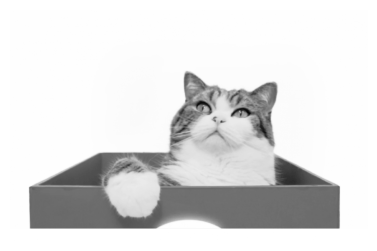

In [7]:
from PIL import Image
import urllib
import numpy as np
from matplotlib import pyplot as plt

def read_image(url):
    return np.array(Image.open(urllib.request.urlopen(url)))

url = "https://i.pinimg.com/originals/0e/d0/23/0ed023847cad0d652d6371c3e53d1482.png"

img = read_image(url)

def to_greyscale(im):
    return 1 - np.dot(im[...,:3], [0.2989, 0.5870, 0.1140])

img = to_greyscale(img)

plt.imshow(img, cmap = "Greys")
plt.gca().axis("off")

After implementing your function, you should be able to use it like this, replacing the implementation of `scipy.signal` with your own implementation. The result should look something like this: 

(-0.5, 641.5, 414.5, -0.5)

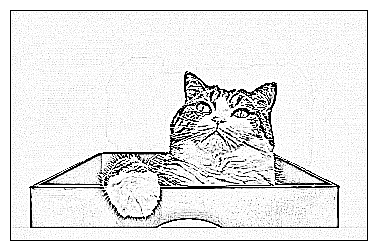

In [8]:
from scipy.signal import convolve2d

kernel = np.array([[-1, -1, -1], 
                   [-1,  8, -1], 
                   [-1, -1, -1]])

convd = convolve2d(img, kernel)

plt.imshow(convd, cmap = "Greys", vmin = 0, vmax = 8)
plt.gca().axis("off")

## Project Check-In {#sec-project-check-in}

*This is a warmup activity that we will repeat weekly until the end of the semester.* 

Prepare a 2-3 minute "presentation" of your project to your group. Your presentation can be informal and does not need to have any special visual aids. The primary expectation is that you are able to demonstrate *some relevant functionality* to your peers. If your project involves coding or data analysis, your relevant functionality might be as simple as accessing or preparing the data. You should plan to demonstrate additional functionality each week. 

In other words, you should show your group *something that works*, regardless of how "big" it is. 

If you are doing a project that does not involve implementation (such as a research essay), then you are still expected to offer an update. Your contributions could include describing the sources you've found or showing your group an outline of the argument that you will make. 

It's appropriate for each member of your project group to give the same presentation during warmup. **Please note that you may not be in the same warmup group as your project partners**. This means that: 

- The code you show needs to run on *your* laptop or in *your* compute instance (e.g. Google Colab). 
- *You* need to be ready to explain what is being shown, even if your project partners did much of the work. 

## What Needs To Be Learned? {#sec-transfer-learning}

Suppose that you wanted to teach an individual to recognize English-language [phishing emails](https://consumer.ftc.gov/articles/how-recognize-and-avoid-phishing-scams). Write down a few features (based on the linked website, your own experience, or other sources) that you think would help someone classify an email as "phishing attempt or not" based on the text of the email. 

Now, imagine that you are going to sit down with your tutee to teach them how to recognize English-language phishing emails. Where would you start your instruction if...

1. Your tutee was another member of your warmup group. 
2. Your tutee was a fluent English speaker but had never used email. 
3. Your tutee was a regular email user but spoke no English. 
4. Your tutee spoke no English and had never seen a computer. 

Which of these four scenarios would require the most "learning effort?" Which would require the least? 

## Word Embedding {#sec-word-embedding}

Take out a sheet of paper and a pencil. Your goal is to place the following words on the sheet of paper in such a way that their location on the sheet is indicative of their relationships to each other. You can decide exactly how to do this. Should words with similar meanings be in the same part of the page? Should pairs of words with similar *relationships* have similar distances? Your approach is up to you, but please **write it down** along with your placements. Your words are: 

- *Woman*
- *Student*
- *Nurse*
- *Doctor*
- *Man*
- *Professor*
- *Model*
- *Computer*
- *Machine*
- *Programmer*

## Realistic Text? {#sec-realistic-text}

In our reading on [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/), there are a few examples of model output that is *realistic* but not *real*. Pick one of the examples, and write down as carefully as you are able what makes the generated text *realistic*. Then, describe what "tells" would tip off an attentive observer that the text isn't real (generated intentionally by a human) after all. 

The Shakespeare and Wikipedia examples might be the easiest ones to think about, but feel free to look at the $\LaTeX$ or Linux source code examples if you prefer. 

## Mind Map {#sec-mind-map}

Wow, we've covered a lot of ground in this class! Use a graphics program or a pen/paper to make a mind map describing some of our main theoretical and concepts. As a reminder, a mind-map is a graph in which the nodes are concepts and edges join related concepts. Please incorporate the following concepts as nodes: 

- *Loss function*
- *Target*
- *Predictor*
- *Model*
- *Regression*
- *Classification*
- *Empirical risk minimization*
- *Gradient descent*
- *Feature map*
- *Vectorization*
- *Overfitting*
- *Training data*
- *Validation/testing data*
- *Perceptron*
- *Logistic regression*
- *Neural networks*
- *Linear regression*

Additionally, please incorporate **at least three other concepts of your own choosing**. 

### Flowcharts in Quarto

Since mind-maps can be a little complicated to organize, you might find it easiest to work with some software. One **optional** possibility is actually included with Quarto: the [Mermaid](https://mermaid.js.org/) chart tool can render attractive diagrams that include labeled nodes and directed edges. Using a [flowchart](https://mermaid.js.org/syntax/flowchart.html) is probably the way. For example, inserting the following code into a special `{mermaid}` code block will produce the following diagram: 

```
flowchart TB
    A(First concept) --> B(Second concept)
    B --is part<br> of--> A
    B-->C(Third concept)
    A-->C
    A & B & C -->D(Fourth concept)
```

```{mermaid}
flowchart TB
    A(First concept) --> B(Second concept)
    B --is part<br> of--> A
    B-->C(Third concept)
    A-->C
    A & B & C -->D(Fourth concept)
```

For the basics of using Mermaid with Quarto, see the [Quarto docs](https://quarto.org/docs/authoring/diagrams.html). A benefit of this approach is that you don't have to worry too much about positioning, and you can publish your mind map easily on your blog! On the other hand, this approach doesn't give you much flexibility and makes it harder to be creative about incorporating complex relationships. **Doing your mind map by hand or in any other software is entirely fine**. 






## Classification Rates {#sec-classification-rates}

#### Part 1

COVID-19 rapid tests have approximately an 80% sensitivity rate, which means that, in an individual who truly has COVID-19, the probability of a rapid test giving a positive result is roughly 80%. [These numbers are mostly made-up.]{.aside} On the other hand, the probability of a rapid test giving a positive result for an individual who truly does **not** have COVID-19 is 5%. Suppose that approximately 4% of the population are currently infected with COVID-19. [Example 2.3.1 of [Murphy](https://github.com/probml/pml-book/releases/latest/download/book1.pdf), page 46, has a good review of the relevant probability and the definition of each of the rates below.]{.aside}

Write a Python function called `rate_summary` that prints the following output, filling in the correct values for each of the specified rates:  

```python
s = 0.8           # test sensitivity
f = 0.02          # probability of positive test if no COVID
prevalence = 0.05 # fraction of population infected

rate_summary(s, f, current_infection)
```

```
The true positive rate is ___.
The false positive rate is ___.
The true negative rate is ___. 
The false positive rate is ___. 
```

#### Part 2

1. Suppose that scientists found an alternative rapid test which had a 75% sensitivity rate with a 0% chance of a positive test on someone who is truly not infected. Would you suggest replacing the old rapid tests with these alternative tests? Why? [You don't necessarily need to use your function from the previous part in this part.]{.aside}
2. What if the alternative test had an 85% sensitivity rate and a 10% chance of a positive test on someone who is truly not infected?  

#### Part 3

It's all well and good to do the math, but what about when we actually have data? Write a function called `rate_summary_2` that accepts two columns of a `pandas.DataFrame` (or equivalently two one-dimensional `numpy.arrays` of equal length). Call these `y` and `y_pred`. Assume that both `y` and `y_pred` are binary arrays (i.e. arrays of 0s and 1s). `y` represents the true outcome, whereas `y_pred` represents the prediction from an algorithm or test. Here's an example of the kind of data we are thinking about: 

In [9]:
import pandas as pd

url = "https://github.com/middlebury-csci-0451/CSCI-0451/raw/main/data/toy-classification-data.csv"
df = pd.read_csv(url)

df.head() # just for visualizing the first few rows

,y,y_pred
0,0,0
1,1,0
2,1,0
3,0,1
4,0,0


You should be able to use your function like this: 

```python
# y is the true label, y_pred is the prediction
rate_summary_2(df["y"], df["y_pred"]) 
```

```
The true positive rate is ___.
The false positive rate is ___.
The true negative rate is ___. 
The false positive rate is ___. 
```

##### Hints

An excellent solution for this part will not use any for-loops. Computing each of the four rates can be performed in a single compact line of code. To begin thinking of how you might do this, you may want to experiment with code like the following: 

```python
df[["y"]] == df[["y_pred"]]
df[["y"]].sum(), df[["y"]].sum()
```